In [9]:
%matplotlib inline

# Script to read and plot CTD profiles from the vessel Sea-bird instrument and the handheld CastAway instrument

## Sea-bird CTD

The ship-mounted CTD relies on a water pump for sampling, and the instrument is kept close to the surface for a while before and after profiling as the pump is manually started and stopped. The excess surface data isn't necessarily removed from the profiles, but feel free to do so. A tip: don't filter data based on the measured parameter such as salinity, but do it based on the depth data. The raw `HEX` data are processed onboard to provide `ASCII` (see the `CNV` files), and the `seabird` Python package is used to make `netCDF` files. The variables that are relevant here are `TEMP` - temperature, `PSAL` - salinity measured in practical salinity units, `DEPTH` - the depth in meters (defined as positive), and `sigma_t` - the density anomaly (see here: https://glossary.ametsoc.org/wiki/Sigma-t). 

## CastAway CTD

The CastAway CTD uses bluetooth to connect to a PC in order to offload data. Sontek, the producer of the CastAway CTD, only provides a Windows program to accomplish this task, and hence there is no support for users of Linux or Mac. This situation is quite typical when it comes to hardware. Hence we need to read and processed the data using the Sontek software, and we end up with single profiles in an `ASCII` file. The data are read into Python through the `ctd` library, which contains functions to interpret a variety of instruments.  



In [1]:
from matplotlib import pyplot as plt
import xarray as xr
import ctd 

In [2]:
# Read profiles
lysaker1 = xr.open_dataset('data/lysakerfjorden_1.nc')
lysaker2 = xr.open_dataset('data/lysakerfjorden_2.nc')
nesoddenE1 = xr.open_dataset('data/oksenvallflua_1.nc')
nesoddenE2 = xr.open_dataset('data/oksenvallflua_2.nc')
nesoddenW = xr.open_dataset('data/nesoddtangen_V.nc')

# Plotting (DEMO BASED ON DATA FROM 2023)

## Difference between stations 

We plot the three first stations to show the differences in temperature, salinity and density at different positions from measurements taken fairly close in time. 

## Difference in time

We have repeated stations at Lysaker and Nesodden E, and these are plotted on top of each other, focusing on the surface layer. For the repeated stations, I suggest you add plots of temperature and salinity as well. By visual comparison with the density profiles, what do you think is the primary cause of the differences? Salinity or temperature? I recommend also spending some effort on making TS diagrams of the profiles as these are usually very informative! (see e.g. https://github.com/larsonjl/earth_data_tools/tree/master/TS%20%20Plot%20Example).

## Stratification and stability of the water column

We hade drifters with drogues at about 1m, 3m, 5m, and 20m, which means that we can estimate the velocity shear $S = |du/dz|$ at the depths 2m, 4m, and 12.5 m (plus a few more levels if you combine them in different ways). What is the corresponding values of the buoyancy frequency $N$ at station Nesodden E? Here $$N² \equiv -\frac{g}{\rho_0}\frac{\partial\rho}{\partial z}.$$ Recall that $\rho_0 = 1000 + \sigma_t$. What is the gradient Richardson number? $$\mathrm{Ri} \equiv \frac{N²}{S²}.$$ Are there any major differences in your estimates if you use the density profiles from the first vs. the second visit to Nesodden E?


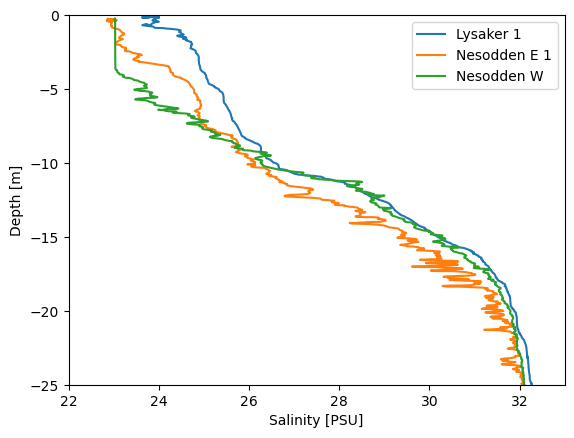

In [3]:
# Salinity
plt.plot(lysaker1.PSAL, -lysaker1.DEPTH, label='Lysaker 1')
plt.plot(nesoddenE1.PSAL, -nesoddenE1.DEPTH, label='Nesodden E 1')
plt.plot(nesoddenW.PSAL, -nesoddenW.DEPTH, label='Nesodden W')
plt.xlabel('Salinity [PSU]')
plt.ylabel('Depth [m]')
plt.axis([22, 33, -25, 0]) # Comment out this line to see the full profiles
plt.legend()

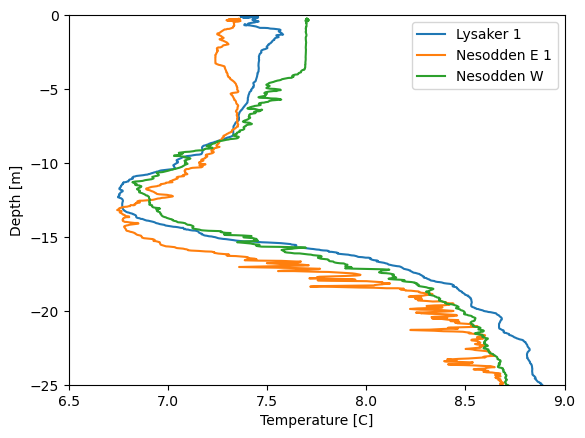

In [4]:
# Temperature
plt.plot(lysaker1.TEMP, -lysaker1.DEPTH, label='Lysaker 1')
plt.plot(nesoddenE1.TEMP, -nesoddenE1.DEPTH, label='Nesodden E 1')
plt.plot(nesoddenW.TEMP, -nesoddenW.DEPTH, label='Nesodden W')
plt.xlabel('Temperature [C]')
plt.ylabel('Depth [m]')
plt.axis([6.5, 9, -25, 0]) # Comment out this line to see the full profiles
plt.legend()

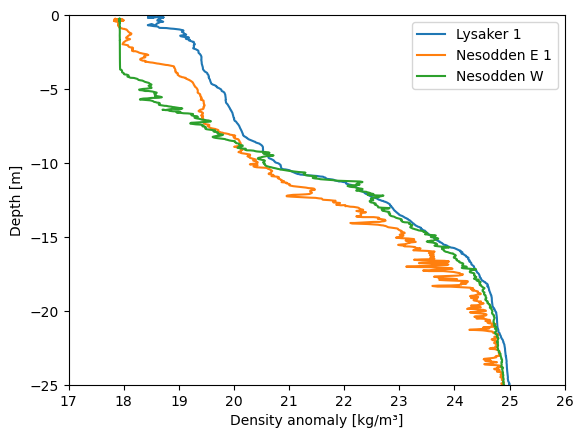

In [5]:
# Density anomaly
plt.plot(lysaker1.sigma_t, -lysaker1.DEPTH, label='Lysaker 1')
plt.plot(nesoddenE1.sigma_t, -nesoddenE1.DEPTH, label='Nesodden E 1')
plt.plot(nesoddenW.sigma_t, -nesoddenW.DEPTH, label='Nesodden W')
plt.xlabel('Density anomaly [kg/m³]')
plt.ylabel('Depth [m]')
plt.axis([17, 26, -25, 0]) # Comment out this line to see the full profiles
plt.legend()

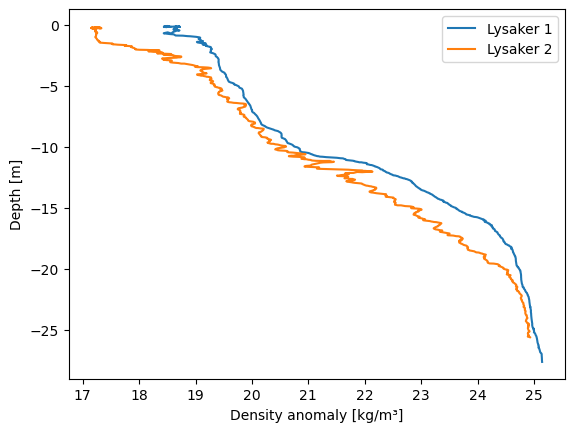

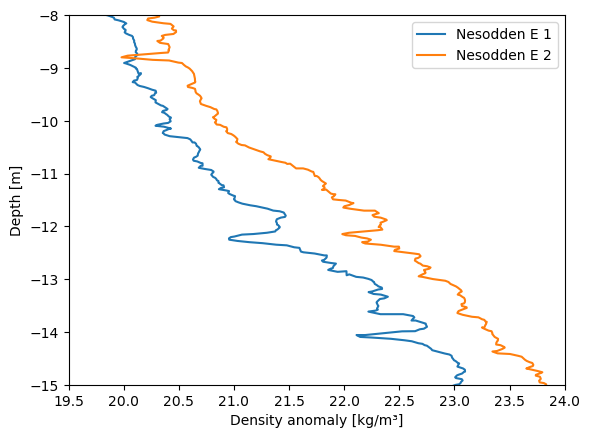

In [6]:
# Plot repeated stations
plt.figure()
plt.plot(lysaker1.sigma_t, -lysaker1.DEPTH, label='Lysaker 1')
plt.plot(lysaker2.sigma_t, -lysaker2.DEPTH, label='Lysaker 2')
plt.xlabel('Density anomaly [kg/m³]')
plt.ylabel('Depth [m]')
#plt.axis([17, 26, -25, 0]) # Comment out this line to see the full profiles
plt.legend()

plt.figure()
plt.plot(nesoddenE1.sigma_t, -nesoddenE1.DEPTH, label='Nesodden E 1')
plt.plot(nesoddenE2.sigma_t, -nesoddenE2.DEPTH, label='Nesodden E 2')
plt.xlabel('Density anomaly [kg/m³]')
plt.ylabel('Depth [m]')
plt.axis([19.5, 24, -15, -8]) # Comment out this line to see the full profiles
plt.legend()

# Difference between instruments

Below we show plots of temperature and salinity from both CTDs from two of the stations. The results are quite different and you should be able to come up with at least five candidate explanations.

Text(0, 0.5, 'Depth [m]')

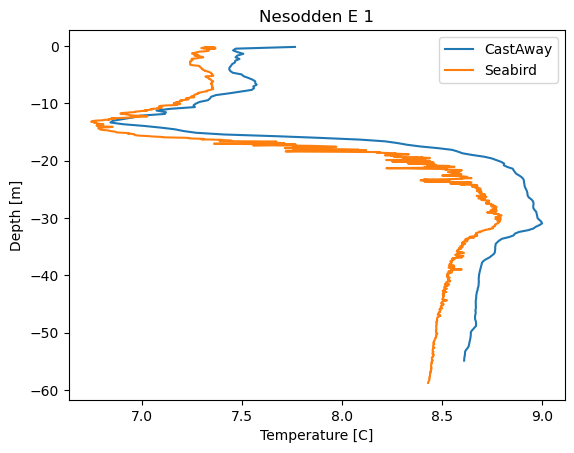

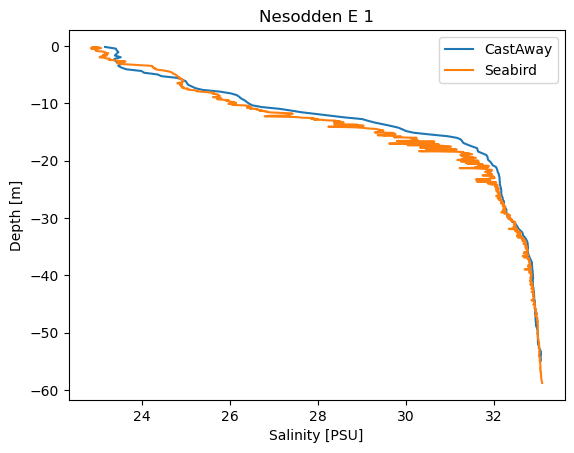

In [7]:
# Nesodden E 1
ca_nesoddenE1, u = ctd.from_castaway_csv('data/CA_nesodden_E_1.csv').split()
temp = ca_nesoddenE1['temperature']
salt = ca_nesoddenE1['salinity']
depth = ca_nesoddenE1['depth']

plt.figure()
plt.plot(temp,-depth, label='CastAway')
plt.plot(nesoddenE1.TEMP, -nesoddenE1.DEPTH, label='Seabird')
plt.legend()
plt.title('Nesodden E 1')
plt.xlabel('Temperature [C]')
plt.ylabel('Depth [m]')

plt.figure()
plt.plot(salt,-depth, label='CastAway')
plt.plot(nesoddenE1.PSAL, -nesoddenE1.DEPTH, label='Seabird')
plt.legend()
plt.title('Nesodden E 1')
plt.xlabel('Salinity [PSU]')
plt.ylabel('Depth [m]')

Text(0, 0.5, 'Depth [m]')

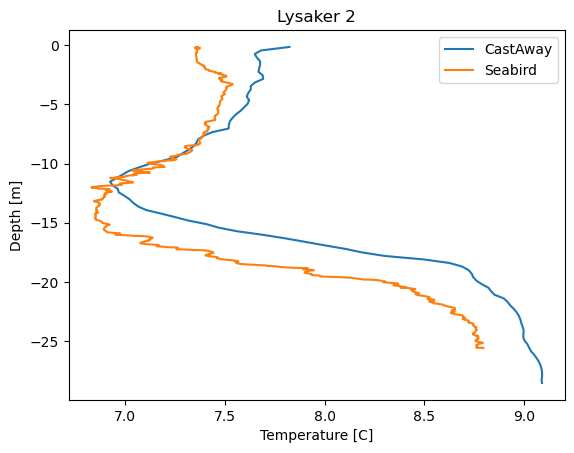

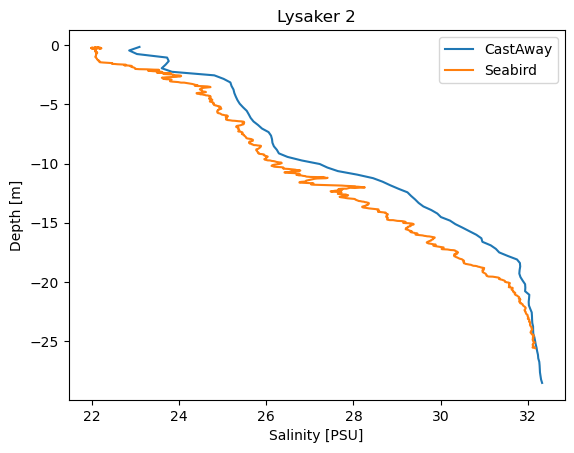

In [8]:
# Lysaker 2
ca_lysaker2, u = ctd.from_castaway_csv('data/CA_lysaker_2.csv').split()
temp = ca_lysaker2['temperature']
salt = ca_lysaker2['salinity']
depth = ca_lysaker2['depth']

plt.figure()
plt.plot(temp,-depth, label='CastAway')
plt.plot(lysaker2.TEMP, -lysaker2.DEPTH, label='Seabird')
plt.legend()
plt.title('Lysaker 2')
plt.xlabel('Temperature [C]')
plt.ylabel('Depth [m]')

plt.figure()
plt.plot(salt,-depth, label='CastAway')
plt.plot(lysaker2.PSAL, -lysaker2.DEPTH, label='Seabird')
plt.legend()
plt.title('Lysaker 2')
plt.xlabel('Salinity [PSU]')
plt.ylabel('Depth [m]')